# The most streamed songs on Spotify in 2023

This project analyzes a dataset of 951 songs that were the most streamed
songs on Spotify in 2023. Details about the dataset can be found [here](./dataset.md).

## Cleaning the data

Cleaning the data involved replacing text characters that got corrupted 
when the data was exported from Spotify into the CSV file, making it 
impossible for Pandas to import with the read_csv() function. Most of the
characters that got corrupted were letters with symbols above them (like
é or ä) which are not found in the English language. There was also one 
row where the data was crunched into one cell and was missing fields, so 
it was omitted in the cleaned data set. There are still some characters 
that show up as unknown, but that didn't prevent the file from being read.

Another issue that showed up is that there were some track names and artist 
names that get cut off abruptly. This is not a big issue for song titles,
as that field wasn't used for its content, and while there is a section that 
counts artists over the dataset, the number of artists that get cut off are 
only on one or two lines.

## Analysis

### Importing the data

Let's start with importing the dataset and looking at the first 20 rows:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind, normaltest

In [2]:
csv_file = "spotify-2023-cleaned.csv"

df = pd.read_csv(csv_file, sep=",")

In [3]:
df.head(20)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
1,Flowers,Miley Cyrus,1,2023,1,12,12211,115,1316855716,300,...,118,A,Minor,71,65,68,6,0,3,7
2,El Azul,"Junior H, Peso Pluma",2,2023,2,10,692,25,354495408,10,...,144,A,Minor,56,84,65,23,0,10,6
3,LUNA,"Junior H, Peso Pluma",2,2023,6,22,201,11,55842345,19,...,128,A,Minor,75,79,63,33,0,15,4
4,Miracle (with Ellie Goulding),"Calvin Harris, Ellie Goulding",2,2023,3,10,5120,48,211050784,161,...,143,A,Major,64,31,87,4,4,8,4
5,OMG,NewJeans,1,2023,1,2,1783,27,430977451,26,...,127,A,Minor,80,74,77,36,0,11,4
6,Mi Bello Angel,Natanael Cano,1,2023,6,30,86,8,31873544,7,...,128,A,Minor,81,90,77,1,0,9,5
7,Nosso Quadro,"Ana Castela, AgroPlay",2,2023,2,2,894,9,233801632,14,...,160,A,Major,69,61,71,33,0,31,20
8,"Am I Dreaming (Metro Boomin & A$AP Rocky, Roisee)","A$AP Rocky, Metro Boomin, Roisee",3,2023,6,2,727,16,94186466,17,...,90,A,Minor,60,13,53,4,0,21,4
9,Self Love (Spider-Man: Across the Spider-Verse...,"Metro Boomin, Coi Leray",2,2023,6,2,332,5,70106975,18,...,120,A,Major,78,5,30,21,0,13,5


In [4]:
df.dtypes

track_name               object
artist(s)_name           object
artist_count              int64
released_year             int64
released_month            int64
released_day              int64
in_spotify_playlists      int64
in_spotify_charts         int64
streams                   int64
in_apple_playlists        int64
in_apple_charts           int64
in_deezer_playlists       int64
in_deezer_charts          int64
in_shazam_charts        float64
bpm                       int64
key                      object
mode                     object
danceability_%            int64
valence_%                 int64
energy_%                  int64
acousticness_%            int64
instrumentalness_%        int64
liveness_%                int64
speechiness_%             int64
dtype: object

We have quite a few columns to work with, and many of them are numeric.
What is interesting is we also have categorical columns for key and mode,
which I am interested in looking at.

In [5]:
df.count()

track_name              951
artist(s)_name          951
artist_count            951
released_year           951
released_month          951
released_day            951
in_spotify_playlists    951
in_spotify_charts       951
streams                 951
in_apple_playlists      951
in_apple_charts         951
in_deezer_playlists     951
in_deezer_charts        951
in_shazam_charts        901
bpm                     951
key                     951
mode                    951
danceability_%          951
valence_%               951
energy_%                951
acousticness_%          951
instrumentalness_%      951
liveness_%              951
speechiness_%           951
dtype: int64

Doesn't look like there are any glaring missing values in the dataset, 
as all the columns have a count of 951.

### Keys and Mode

I'm curious to see what keys and modes the top streamed songs are 
comprised of. I know C Major and G Major are common in pop music, 
and A Minor, being the relative minor of C Major, is probably pretty 
common as well. First, let's get the counts of songs grouped by key 
and mode:

In [6]:
keys = df.groupby(["key", "mode"])["track_name"].count().unstack()
keys

mode,Major,Minor
key,,
A,41,35
A#,27,30
B,35,46
C,73,19
C#,73,47
D,66,15
D#,12,21
E,17,45
F,44,45


We now have a table of the total values for each key-mode combination.
Let's get the sum of both modes and see what this distribution is like 
with a bar graph:

In [7]:
keys.Major.sum(), keys.Minor.sum()

(548, 403)

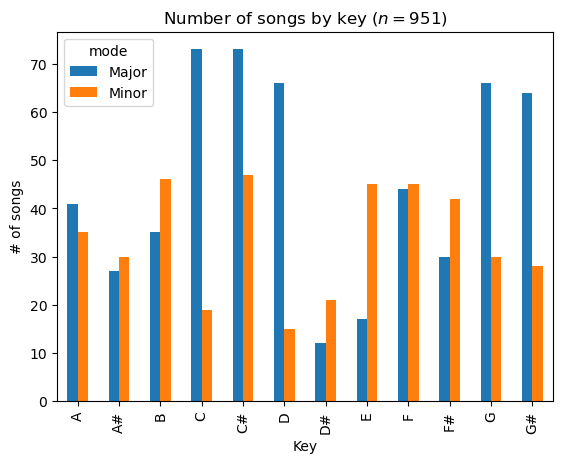

In [8]:
# savefig_kwargs = dict(
#     dpi = 300,
#     metadata = {"Author": "Zach Chartrand"},
# )

keys.plot.bar(
    title = r"Number of songs by key ($n = 951$)",
    xlabel = "Key",
    ylabel = "# of songs",
)

# plt.savefig("graphs/key_mode_bar.png", **savefig_kwargs)

plt.show()

I was not expecting C# Major to be as common as C Major; I would have 
thought that songs one half-step way from the Common Key would sound 
too odd to the casual listener's ear. I'm also surprised that A Minor 
is only the sixth most common minor key and that B Minor, E Minor, 
F Minor, and F# minor are all more common than C Minor, as I know 
quite a few songs written in that key. Then again, I don't recognize 
many of the artists in this dataset, so that might be due to the 
fact that I listen to completely different music.

### Distribution of songs by stream count

The `streams` column shows the number of streams each song had 
in 2023. Let's see how these values are distributed among the 
songs with a histogram:

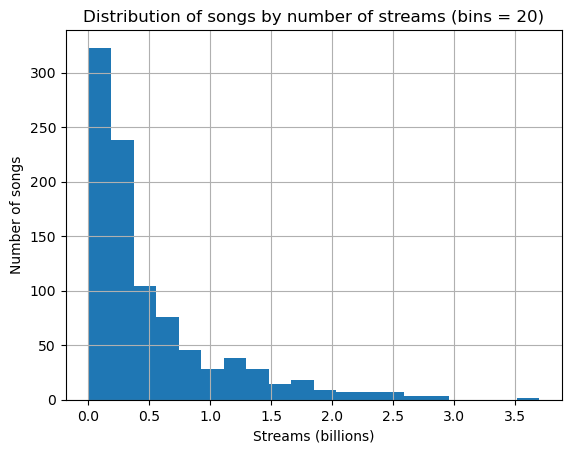

In [9]:
ax = (df["streams"] / 1e9).hist(bins=20)

ax.set_title("Distribution of songs by number of streams (bins = 20)")
ax.set_xlabel("Streams (billions)")
ax.set_ylabel("Number of songs")

# plt.savefig("graphs/streams_hist.png", **savefig_kwargs)

plt.show()

The graph is highly right skewed, with the majority of songs 
categorized as having less than one billion streams over the year.
This is likely a Pareto distribution based on the fact that this 
metric is based on popularity.

### Top artists

After seeing the first 20 rows, I was curious to see who were the top 
artists of 2023. We can use Pandas' `Series.value_counts()` method for this: 

In [10]:
artists = df["artist(s)_name"].value_counts()

In [11]:
artists.head(20)

Taylor Swift        34
The Weeknd          22
Bad Bunny           19
SZA                 19
Harry Styles        17
Kendrick Lamar      12
Morgan Wallen       11
Ed Sheeran           9
Feid                 8
Drake, 21 Savage     8
BTS                  8
Olivia Rodrigo       7
Labrinth             7
NewJeans             6
Doja Cat             6
Billie Eilish        5
Drake                4
Karol G              4
Eminem               4
M��ne                4
Name: artist(s)_name, dtype: int64

We have Taylor Swift at the top; other well-known
artists like Harry Styles, Ed Sheeran, and Drake; and 
a bunch of other artists like Karol G, Labrinth, 
and SZA, who are not in my personal radar of pop singers. However, 
this list shows us a bit of an issue. Because some 
songs have collaborating artists, the songs that an artist was a part 
of in a collaboration do not get counted together with the songs they did 
solo. For instance, in this list of 20 artists, Drake is listed twice, 
once by himself and another with an artist called 21 Savage. We can see 
the difference in total songs versus what is listed by the following line 
of code with songs by Taylor Swift:

In [12]:
len(df[df["artist(s)_name"].str.contains("Taylor Swift")][["artist(s)_name"]])

38

We have 38 total, whereas before we had 34. I have written some code 
to extract songs with one artist versus those with multiple artists 
and did a different counting method for counting up songs by artist:

In [13]:
single_artists = pd.Series(df[~df["artist(s)_name"].str.contains(",")]["artist(s)_name"].str.strip().unique())

In [14]:
collab_artists = df[df["artist(s)_name"].str.contains(",")]["artist(s)_name"]
collab_artists = collab_artists.str.split(",").to_numpy()
flat = []
for artists in collab_artists:
    for artist in artists:
        flat.append(artist.strip())
collab_artists = pd.Series(flat)

In [15]:
artists = pd.concat([single_artists, collab_artists]).unique()

In [16]:
counts = np.asarray([len(df[df["artist(s)_name"].str.contains(artist, regex=False)][["artist(s)_name"]])
        for artist in artists], dtype=int)

In [17]:
artist_counts = pd.DataFrame(data=[artists, counts]).T
artist_counts.columns = ["artist", "count"]
artist_counts["count"] = artist_counts["count"].astype("int")

In [18]:
artist_counts.sort_values("count", ascending=False).head(20)

,artist,count
557,,951
510,M,177
495,Bad B,41
0,Bad Bunny,40
12,Taylor Swift,38
61,The Weeknd,37
184,V,28
71,Kendrick Lamar,23
59,SZA,23
42,Feid,21


Other than the fields with single letters and an empty string, we now 
have a better count of songs by each artist. Whereas before Taylor Swift 
was the most common artist on the list, now it's Bad Bunny with all of 
her collaborations. This also shows one of the issues from the dataset 
that I mentioned at the beginning: artist names got cut off for some reason 
when the data was extracted from Spotify, which is why we have both "Bad B" 
and "Bad Bunny" and why "Peso Pluma" and "Peso P" are on this list. This is 
likely what also caused the "M", "V", and "" fields to appear, but since they are 
counting whenever that specific character shows up in an artist's name, we will 
ignore them.

### Danceability of mode

After seeing the metric for danceability, I was curious to see if there was a significant 
difference in danceability between songs in a major key versus those in a minor key. My 
gut instinct says that songs in a major key would be more danceable as they tend to be upbeat
while songs in a minor key tend to feel melancholy and more negative in emotional tone.

Let's first compare the histograms of % danceability for both major and minor keys:

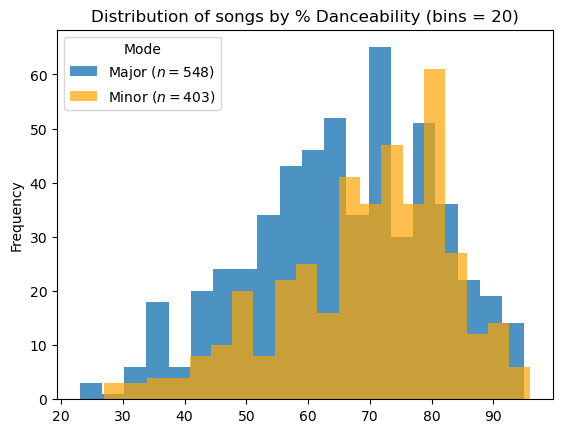

In [19]:
danceability_minor = df[df["mode"] == "Minor"]["danceability_%"]
danceability_major = df[df["mode"] == "Major"]["danceability_%"]

ax = danceability_major.plot.hist(bins=20, alpha=0.8)
danceability_minor.plot.hist(bins=20, color="orange", alpha=0.7)

ax.set_title("Distribution of songs by % Danceability (bins = 20)")
ax.legend(["Major ($n = 548$)", "Minor ($n = 403$)"], title="Mode")

# plt.savefig("graphs/danceability_by_mode_hist.png", **savefig_kwargs)

plt.show()

I admit, I wasn't expecting the means of both histograms to be so close to each other.
We can see that both datasets are left-skewed and that the Major Mode set has a wider 
variance than the Minor Mode set.

Because both graphs are similar in shape, we can run a two-sample t-test to see if there 
is a statistically significant difference between the two means. The null hypothesis is that
there is no significant difference between the mean danceability between the two modes; 
the alternative hypothesis is that there is a significant difference. First, let's look at 
their means and variances:

In [20]:
print(f"Danceability (%) mean, Major Mode: {(danceability_major).mean()}")
print(f"Danceability (%) mean, Minor Mode: {(danceability_minor).mean()}")
print()
print(f"Danceability (%) variance, Major Mode: {(danceability_major).var()}")
print(f"Danceability (%) variance, Minor Mode: {(danceability_minor).var()}")

Danceability (%) mean, Major Mode: 65.2043795620438
Danceability (%) mean, Minor Mode: 69.42183622828784

Danceability (%) variance, Major Mode: 224.6053189927808
Danceability (%) variance, Minor Mode: 190.41365134624644


Because the variance between the two datasets is not equal, we have to include that fact 
in our two-sample t-test function.

In [21]:
tstat, pval = ttest_ind(danceability_major, danceability_minor, equal_var=False)
print(tstat, pval)

-4.489822350304254 8.051064271754402e-06


Our p-value is on the order of 1 in 100,000, so the difference 
between the two means is very likely to be statitistically 
significant. I interpret this as follows: If a song is in a minor 
key, it is more likely to be in the topped streamed songs on Spotify 
if it has a high Danceability %, whereas songs in a major key 
have other qualities that make them highly streamed. This conclusion 
is based on the fact that the minor key variance is lower and its 
distribution is more left skewed than the major key distribution. 
The major key distribution's more normal shape and higher variance 
implies that Danceability % is a less significant factor in 
determining if a major key song is streamed in large amounts.